In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

    gender             race  readmitted
0        ?                ?        3505
1        ?  AfricanAmerican        1959
2        ?            Asian          41
3        ?        Caucasian        7038
4        ?         Hispanic         213
5        ?            Other          87
6   Female                ?        5472
7   Female  AfricanAmerican        2528
8   Female            Asian          60
9   Female        Caucasian       10117
10  Female         Hispanic         199
11  Female            Other         185
12    Male                ?        4522
13    Male  AfricanAmerican        1639
14    Male            Asian          57
15    Male        Caucasian        8920
16    Male         Hispanic         193
17    Male            Other         167


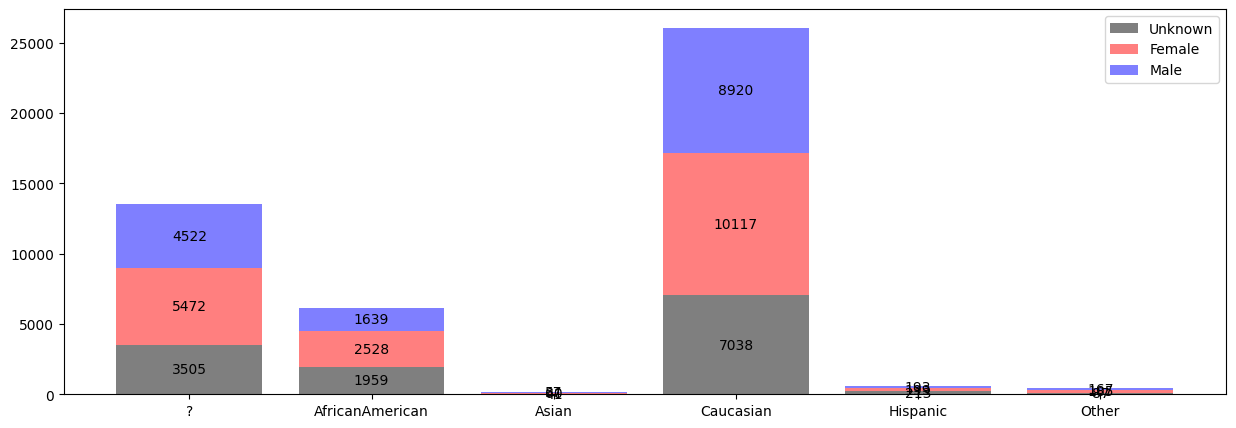

In [1]:
# Load the data
data = pd.read_csv('../diabetes_130/simulations/westin.csv')

# all ages
data_readm = data[data['readmitted'] != 'NO']
sex_race_readm = data_readm.groupby(['gender','race'])['readmitted'].count().reset_index()
fig, ax = plt.subplots(figsize=(15, 5))
sex_unknown = sex_race_readm.loc[sex_race_readm['gender'] == '?']
sex_female = sex_race_readm.loc[sex_race_readm['gender'] == 'Female']
sex_male = sex_race_readm.loc[sex_race_readm['gender'] == 'Male']
y = sex_race_readm.loc[sex_race_readm['gender'] != 'Male'].groupby('race').sum().reset_index()
ax.bar(sex_unknown['race'], sex_unknown['readmitted'], color='black', label='Unknown', alpha=0.5)
ax.bar(sex_female['race'], sex_female['readmitted'], color='red', label='Female', alpha=0.5, bottom=sex_unknown['readmitted'])
ax.bar(sex_male['race'], sex_male['readmitted'], color='blue', label='Male', alpha=0.5, bottom=y['readmitted'])
plt.legend()
ax.bar_label(ax.containers[0], label_type='center')
ax.bar_label(ax.containers[1], label_type='center')
ax.bar_label(ax.containers[2], label_type='center')
plt.show()

    gender             race  readmitted
0        ?                ?        3505
1        ?  AfricanAmerican        1959
2        ?            Asian          41
3        ?        Caucasian        7038
4        ?         Hispanic         213
5        ?            Other          87
6   Female                ?        5472
7   Female  AfricanAmerican        2528
8   Female            Asian          60
9   Female        Caucasian       10117
10  Female         Hispanic         199
11  Female            Other         185
12    Male                ?        4522
13    Male  AfricanAmerican        1639
14    Male            Asian          57
15    Male        Caucasian        8920
16    Male         Hispanic         193
17    Male            Other         167
              race     ?  Female  Male
0                ?  3505    5472  4522
1  AfricanAmerican  1959    2528  1639
2            Asian    41      60    57
3        Caucasian  7038   10117  8920
4         Hispanic   213     199   193
5     

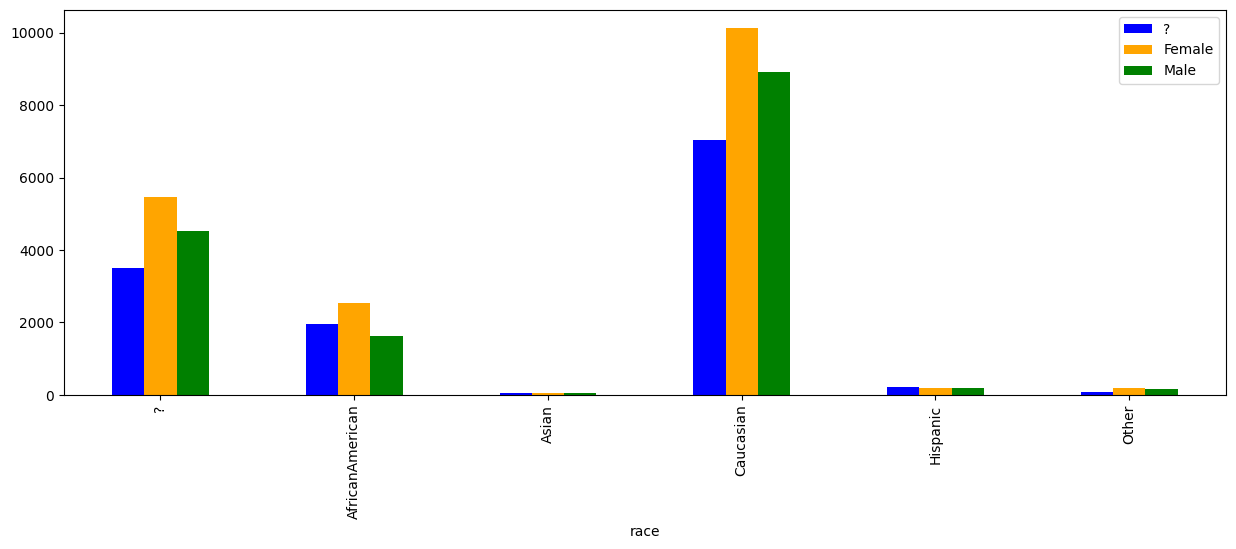

In [2]:
data = pd.read_csv('../diabetes_130/simulations/realistic.csv')

# all ages
data_readm = data[data['readmitted'] != 'NO']
sex_race_readm = data_readm.groupby(['gender','race'])['readmitted'].count().reset_index()
# print(sex_race_readm)
fig, ax = plt.subplots(figsize=(15, 5))
sex_unknown = sex_race_readm.loc[sex_race_readm['gender'] == '?']
sex_female = sex_race_readm.loc[sex_race_readm['gender'] == 'Female']
sex_male = sex_race_readm.loc[sex_race_readm['gender'] == 'Male']

combined = pd.DataFrame(
    columns=['race', '?', 'Female', 'Male'],
)
for index, row in sex_unknown.iterrows():
    combined.loc[len(combined.index)] = [row['race'],row['readmitted'],sex_female.iloc[index, 2],sex_male.iloc[index, 2]]
# print(combined)
colors = ['blue', 'orange', 'green']
(combined.set_index('race')).plot.bar(figsize=(15, 5), ax=ax, color=colors)

plt.legend()
plt.show()

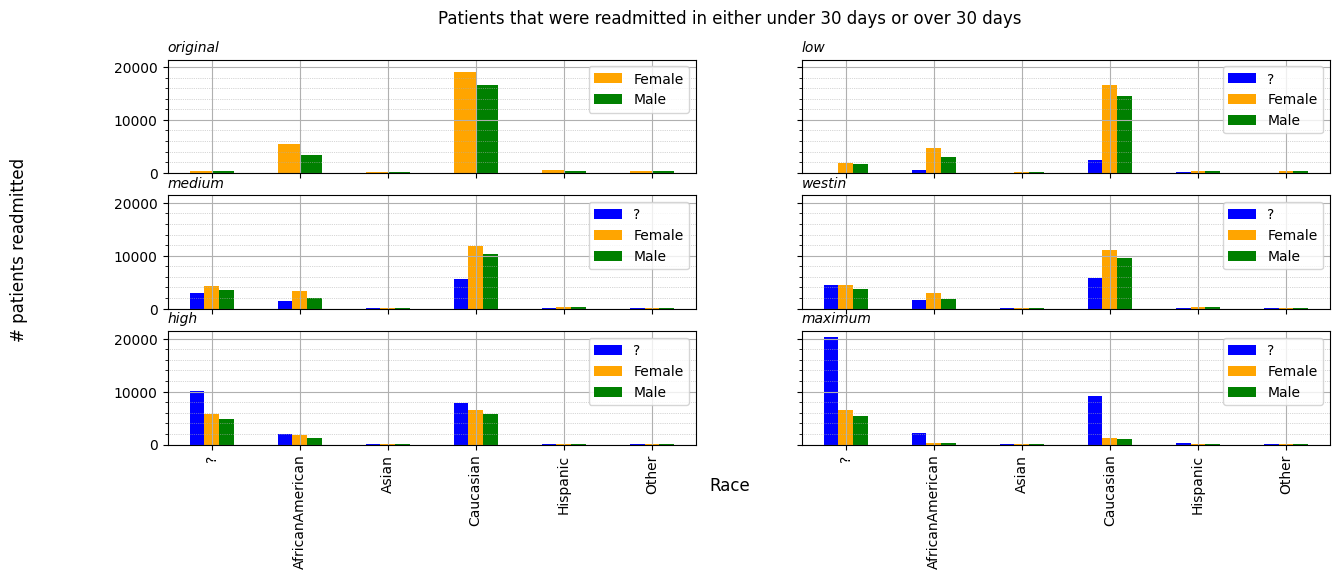

In [2]:
fig = plt.figure(figsize=(30, 200))
ax_array = fig.subplots(3, 2, squeeze=False, sharey=True, sharex=True)
def multiplot(ax, level):
    # Load the data
    if level == 'original':
        colors = ['orange', 'green']
        data = pd.read_csv('../diabetes_130/diabetic_data.csv')
    else:
        colors = ['blue', 'orange', 'green']
        data = pd.read_csv('../diabetes_130/simulations/'+level+'.csv')

    # all ages
    data_readm = data[data['readmitted'] != 'NO']
    sex_race_readm = data_readm.groupby(['gender','race'])['readmitted'].count().reset_index()
    # print(sex_race_readm)
    sex_unknown = sex_race_readm.loc[sex_race_readm['gender'] == '?']
    sex_female = sex_race_readm.loc[sex_race_readm['gender'] == 'Female']
    sex_male = sex_race_readm.loc[sex_race_readm['gender'] == 'Male']

    combined_sex = pd.DataFrame(
        columns=['race', '?', 'Female', 'Male'],
    )

    if level == 'original':
        combined_sex.drop(columns=['?'], inplace=True)
        for index, row in sex_female.iterrows():
            combined_sex.loc[len(combined_sex.index)] = [row['race'], row['readmitted'], sex_male.iloc[index,2]]
    else:
        for index, row in sex_unknown.iterrows():
            combined_sex.loc[len(combined_sex.index)] = [row['race'],row['readmitted'],sex_female.iloc[index, 2],sex_male.iloc[index, 2]]
    # print(combined)
    (combined_sex.set_index('race')).plot.bar(figsize=(15, 5), ax=ax, color=colors)
    ax.grid(which='major', linewidth=0.8)
    ax.grid(which='minor', linestyle=':', linewidth=0.5)
    ax.set_title(level, loc='left', fontstyle='oblique', fontsize='medium')
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.set_xlabel('')

multiplot(ax_array[0, 0], 'original')
multiplot(ax_array[0, 1], 'low')
multiplot(ax_array[1, 0], 'medium')
multiplot(ax_array[1, 1], 'westin')
multiplot(ax_array[2, 0], 'high')
multiplot(ax_array[2, 1], 'maximum')
plt.legend()
plt.xticks(rotation=0)
fig.suptitle('Patients that were readmitted in either under 30 days or over 30 days')
fig.supxlabel('Race')
fig.supylabel('# patients readmitted')
plt.show()

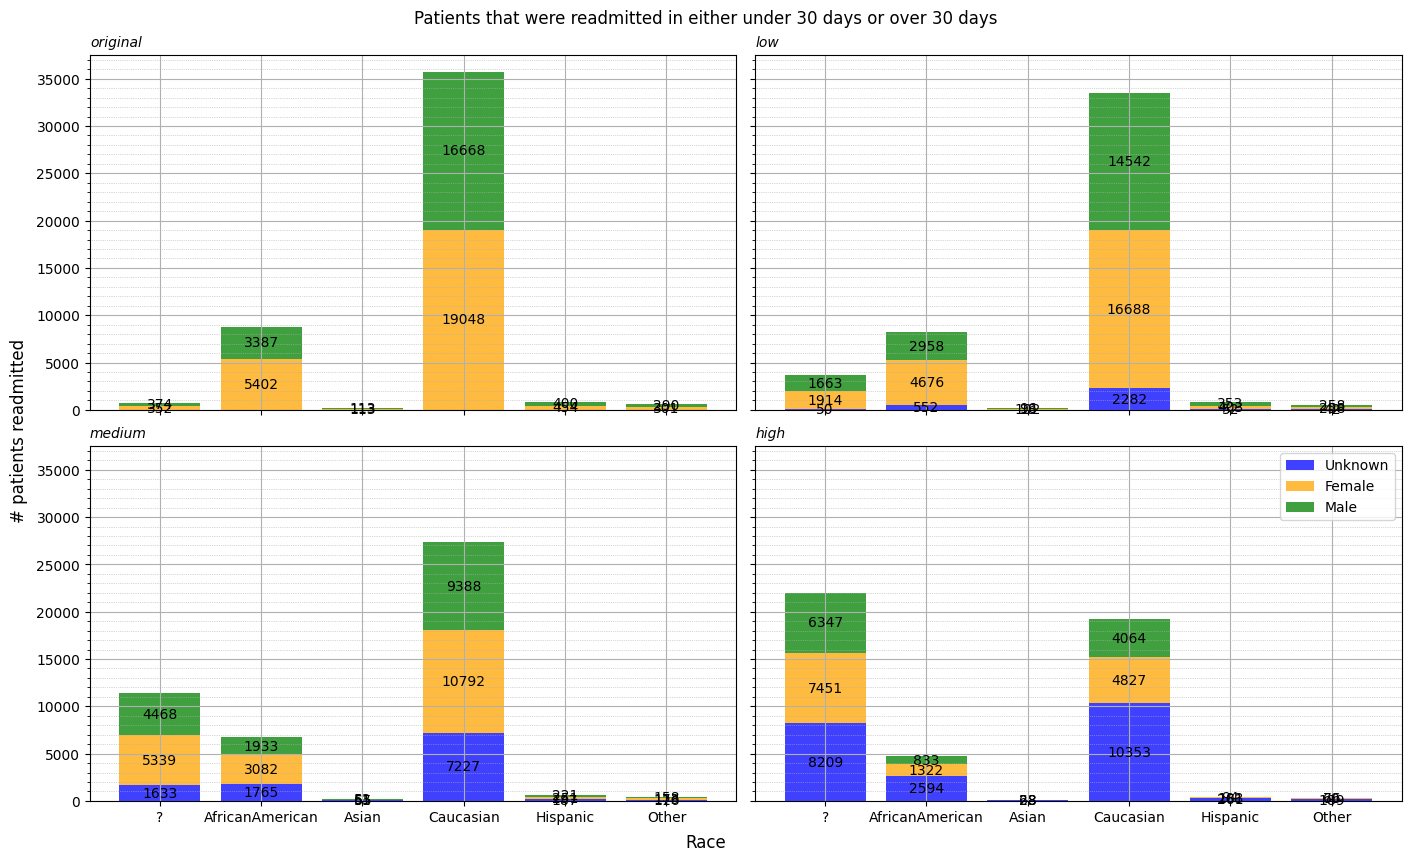

In [14]:
fig = plt.figure(figsize=(14, 8.5), layout='constrained')
ax_array = fig.subplots(2, 2, squeeze=False, sharey=True, sharex=True)
colors = ['blue', 'orange', 'green']
def multiplot(ax, level):
    # Load the data
    if level == 'original':
        data = pd.read_csv('../diabetes_130/diabetic_data.csv')
    else:
        data = pd.read_csv('../diabetes_130/simulations/'+level+'.csv')

    # all ages
    data_readm = data[data['readmitted'] != 'NO']
    sex_race_readm = data_readm.groupby(['gender','race'])['readmitted'].count().reset_index()
    # print(sex_race_readm)
    sex_unknown = sex_race_readm.loc[sex_race_readm['gender'] == '?']
    sex_female = sex_race_readm.loc[sex_race_readm['gender'] == 'Female']
    sex_male = sex_race_readm.loc[sex_race_readm['gender'] == 'Male']

    if level == 'original':
        ax.bar(sex_female['race'], sex_female['readmitted'], color=colors[1], label='Female', alpha=0.75)
        ax.bar(sex_male['race'], sex_male['readmitted'], color=colors[2], label='Male', alpha=0.75, bottom=sex_female['readmitted'])
    else:
        y = sex_race_readm.loc[sex_race_readm['gender'] != 'Male'].groupby('race').sum().reset_index()

        ax.bar(sex_unknown['race'], sex_unknown['readmitted'], color=colors[0], label='Unknown', alpha=0.75)
        ax.bar(sex_female['race'], sex_female['readmitted'], color=colors[1], label='Female', alpha=0.75, bottom=sex_unknown['readmitted'])
        ax.bar(sex_male['race'], sex_male['readmitted'], color=colors[2], label='Male', alpha=0.75, bottom=y['readmitted'])

    ax.grid(which='major', linewidth=0.8)
    ax.grid(which='minor', linestyle=':', linewidth=0.5)
    ax.set_title(level, loc='left', fontstyle='oblique', fontsize='medium')
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.set_xlabel('')

    ax.bar_label(ax.containers[0], label_type='center')
    ax.bar_label(ax.containers[1], label_type='center')
    if level != 'original':
        ax.bar_label(ax.containers[2], label_type='center')

multiplot(ax_array[0, 0], 'original')
multiplot(ax_array[0, 1], 'low')
multiplot(ax_array[1, 0], 'medium')
multiplot(ax_array[1, 1], 'high')

plt.legend()
fig.suptitle('Patients that were readmitted in either under 30 days or over 30 days')
fig.supxlabel('Race')
fig.supylabel('# patients readmitted')
plt.show()

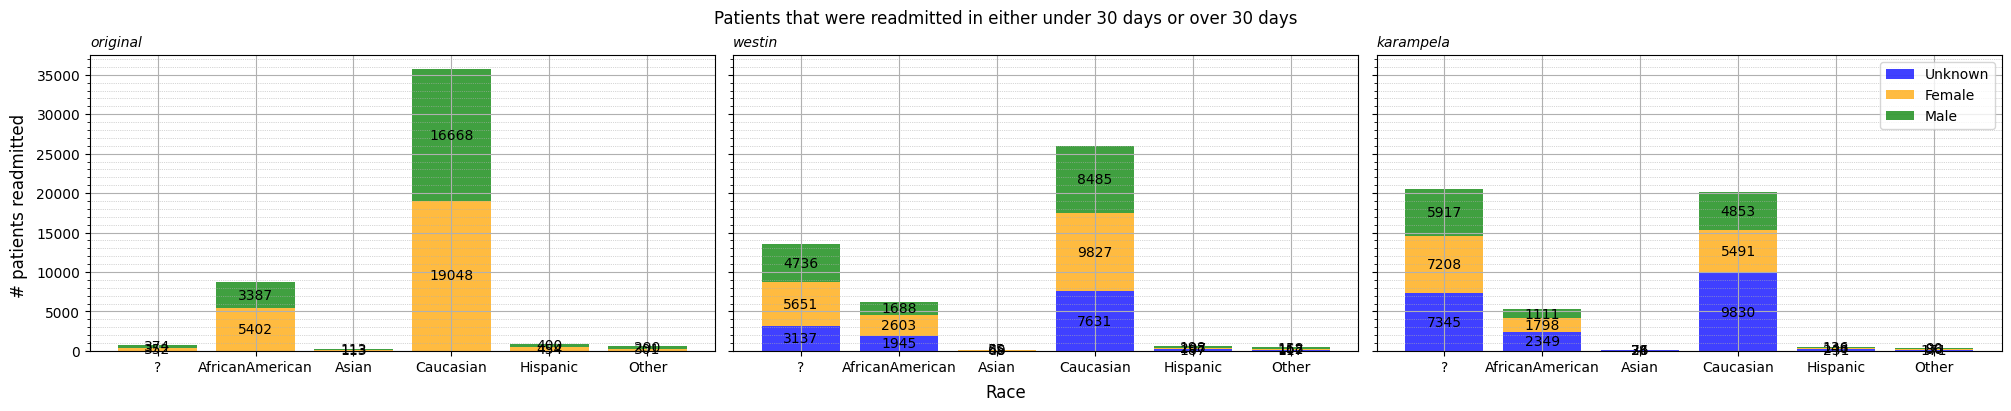

In [3]:
fig = plt.figure(figsize=(20, 4), layout='constrained')
ax_array = fig.subplots(1, 3, squeeze=False, sharey=True, sharex=True)
colors = ['blue', 'orange', 'green']
def multiplot(ax, level):
    # Load the data
    if level == 'original':
        data = pd.read_csv('../diabetes_130/diabetic_data.csv')
    else:
        data = pd.read_csv('../diabetes_130/simulations/'+level+'.csv')

    # all ages
    data_readm = data[data['readmitted'] != 'NO']
    sex_race_readm = data_readm.groupby(['gender','race'])['readmitted'].count().reset_index()
    # print(sex_race_readm)
    sex_unknown = sex_race_readm.loc[sex_race_readm['gender'] == '?']
    sex_female = sex_race_readm.loc[sex_race_readm['gender'] == 'Female']
    sex_male = sex_race_readm.loc[sex_race_readm['gender'] == 'Male']

    if level == 'original':
        ax.bar(sex_female['race'], sex_female['readmitted'], color=colors[1], label='Female', alpha=0.75)
        ax.bar(sex_male['race'], sex_male['readmitted'], color=colors[2], label='Male', alpha=0.75, bottom=sex_female['readmitted'])
    else:
        y = sex_race_readm.loc[sex_race_readm['gender'] != 'Male'].groupby('race').sum().reset_index()

        ax.bar(sex_unknown['race'], sex_unknown['readmitted'], color=colors[0], label='Unknown', alpha=0.75)
        ax.bar(sex_female['race'], sex_female['readmitted'], color=colors[1], label='Female', alpha=0.75, bottom=sex_unknown['readmitted'])
        ax.bar(sex_male['race'], sex_male['readmitted'], color=colors[2], label='Male', alpha=0.75, bottom=y['readmitted'])

    ax.grid(which='major', linewidth=0.8)
    ax.grid(which='minor', linestyle=':', linewidth=0.5)
    ax.set_title(level, loc='left', fontstyle='oblique', fontsize='medium')
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.set_xlabel('')

    ax.bar_label(ax.containers[0], label_type='center')
    ax.bar_label(ax.containers[1], label_type='center')
    if level != 'original':
        ax.bar_label(ax.containers[2], label_type='center')

multiplot(ax_array[0, 0], 'original')
multiplot(ax_array[0, 1], 'westin')
multiplot(ax_array[0, 2], 'karampela')

plt.legend()
fig.suptitle('Patients that were readmitted in either under 30 days or over 30 days')
fig.supxlabel('Race')
fig.supylabel('# patients readmitted')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


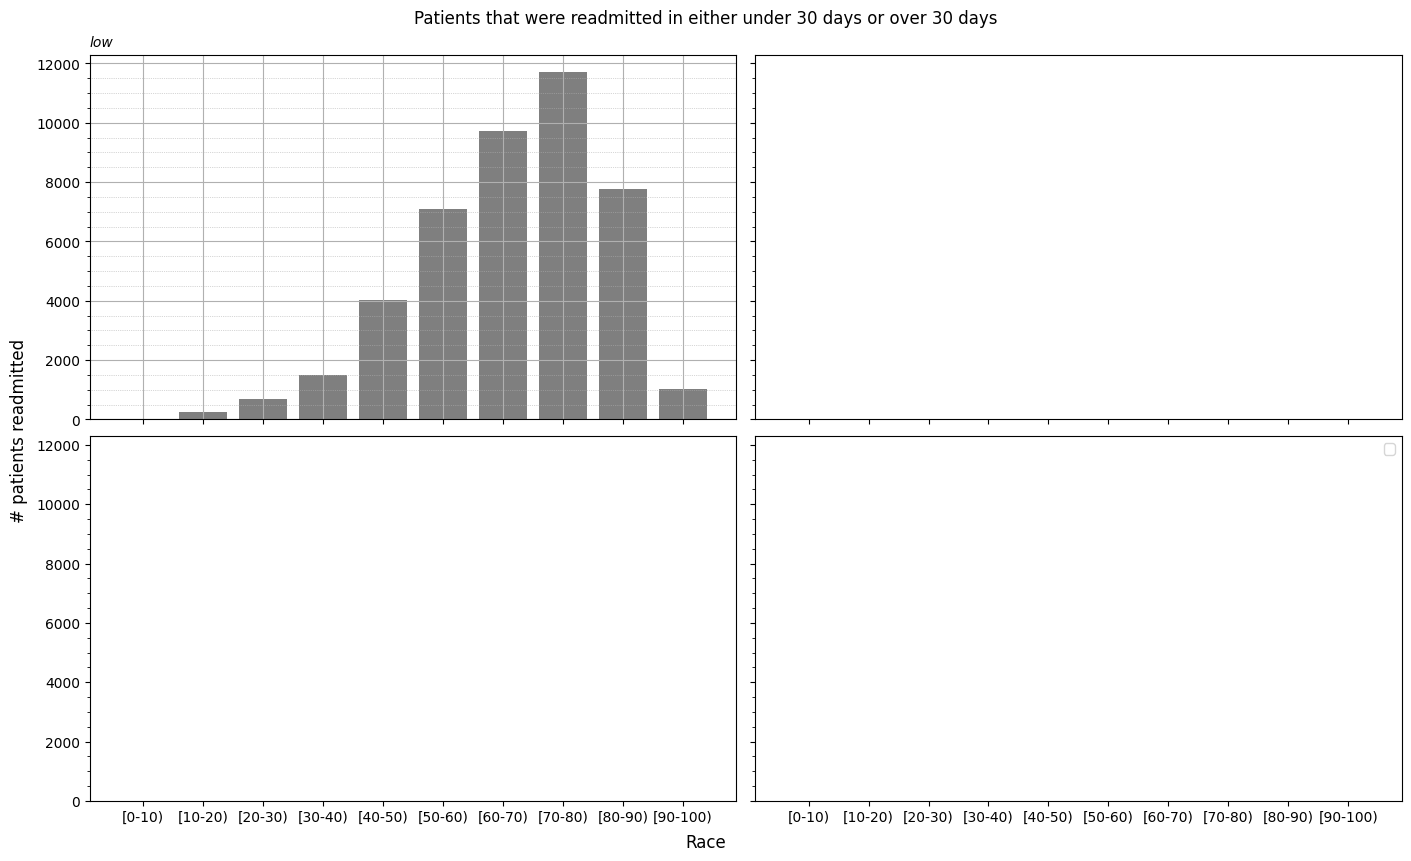

In [24]:
fig = plt.figure(figsize=(14, 8.5), layout='constrained')
ax_array = fig.subplots(2, 2, squeeze=False, sharey=True, sharex=True)
colors = ['blue', 'orange', 'green']
def multiplot(ax, level):
    # Load the data
    if level == 'original':
        data = pd.read_csv('../diabetes_130/diabetic_data.csv')
    else:
        data = pd.read_csv('../diabetes_130/simulations/'+level+'.csv')

    # all readmitted patients
    data_readm = data[data['readmitted'] != 'NO']

    # shares of race in each readmitted age group
    ages = data_readm.groupby(['age', 'race'])['readmitted'].count()
    if level != 'original':
        ages_groups = ages.loc[['[0-30)', '[30-60)', '[60-100)']]
        age_group_counts = ages_groups.groupby('age').sum()
        age_group_counts_array = age_group_counts.array

        ages = ages.drop(labels=['[0-30)', '[30-60)', '[60-100)'])

    age_counts = ages.groupby('age').sum()
    age_counts_array = age_counts.array
    # plot age counts
    ax.bar(age_counts.index, age_counts.values, color='black', label='Unknown', alpha=0.5)
    
    ax.grid(which='major', linewidth=0.8)
    ax.grid(which='minor', linestyle=':', linewidth=0.5)
    ax.set_title(level, loc='left', fontstyle='oblique', fontsize='medium')
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.set_xlabel('')


multiplot(ax_array[0, 0], 'low')


plt.legend()
fig.suptitle('Patients that were readmitted in either under 30 days or over 30 days')
fig.supxlabel('Race')
fig.supylabel('# patients readmitted')
plt.show()

/var/folders/69/knkk0bvs2zj17g66y54b741c0000gn/T/ipykernel_68951/1351957345.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(index, rotation=45, fontsize=13)
/var/folders/69/knkk0bvs2zj17g66y54b741c0000gn/T/ipykernel_68951/1351957345.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=13)
/var/folders/69/knkk0bvs2zj17g66y54b741c0000gn/T/ipykernel_68951/1351957345.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(index, rotation=45, fontsize=13)
/var/folders/69/knkk0bvs2zj17g66y54b741c0000gn/T/ipykernel_68951/1351957345.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocato

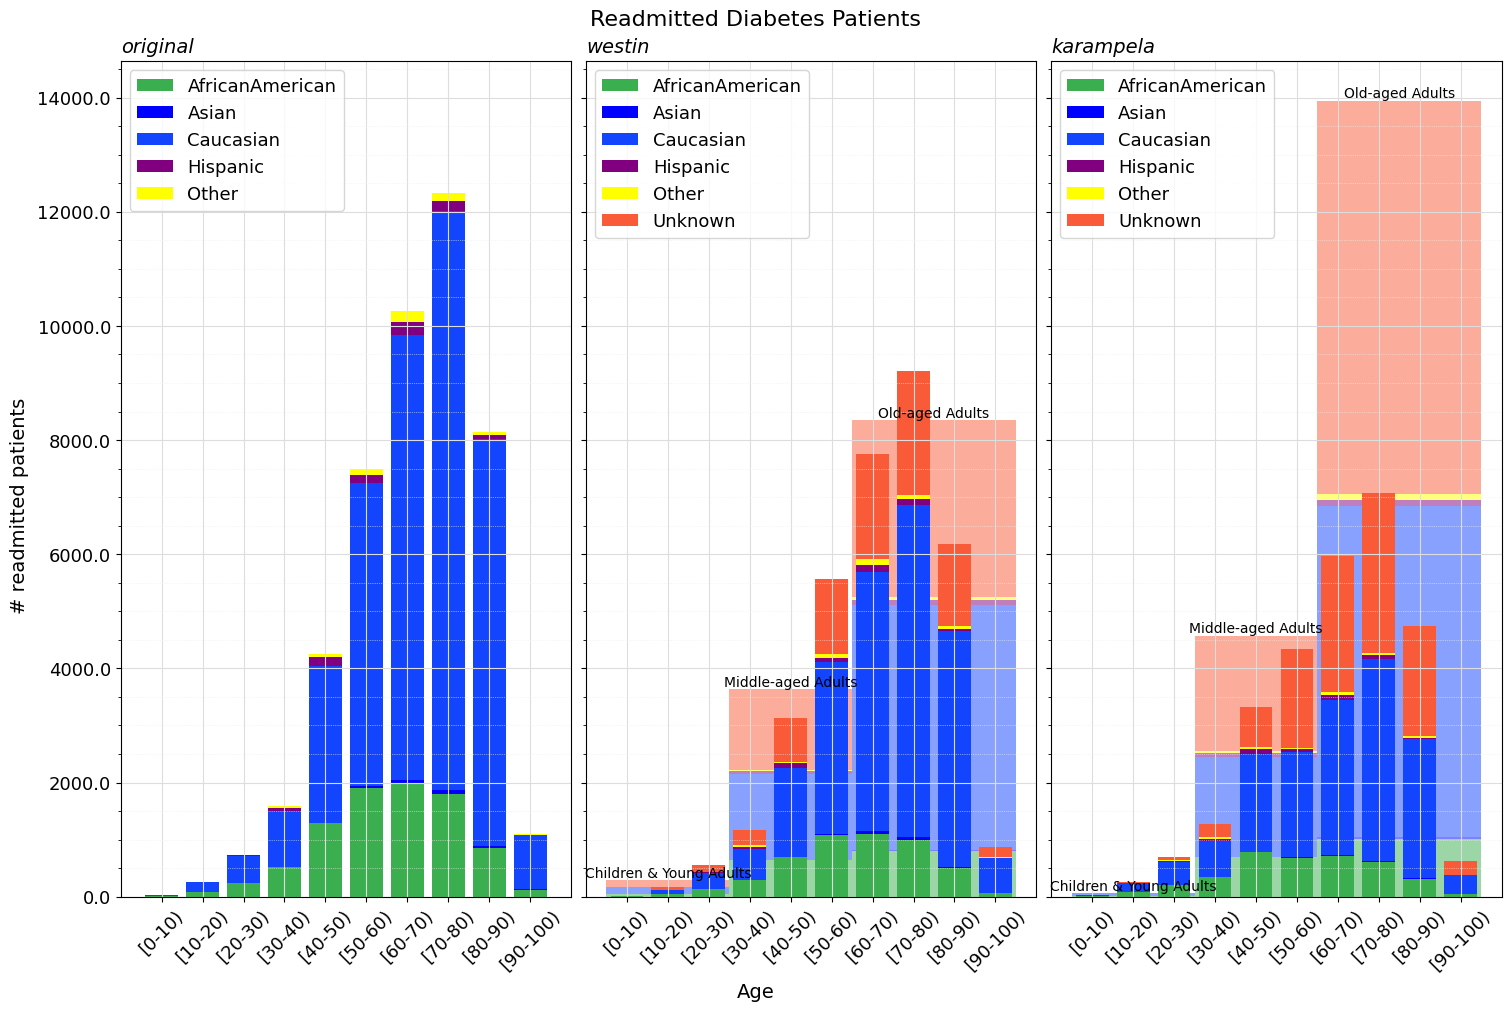

In [3]:
fig = plt.figure(figsize=(15, 10), layout='constrained')
ax_array = fig.subplots(1, 3, squeeze=False, sharey=True, sharex=True)

def mulitplot_stacked(ax, level):
    # Load the data
    if level == 'original':
        data = pd.read_csv('../diabetes_130/diabetic_data.csv')
    else:
        data = pd.read_csv('../diabetes_130/simulations/'+level+'.csv')
    labels = ['Children & Young Adults', 'Middle-aged Adults', 'Old-aged Adults']
    index = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
    data_readm = data[data['readmitted'] != 'NO']

    # all ages
    age_distr = data_readm.groupby(['age','race'])['readmitted'].count()
    # age groups
    if level != 'original':
        age_group_count = age_distr.loc[['[0-30)', '[30-60)', '[60-100)']]
        age_group_count_fixed = age_group_count.reorder_levels(['race', 'age']).sort_index().reset_index()
        race1 = age_group_count_fixed.loc[age_group_count_fixed['race'] == 'AfricanAmerican']
        race2 = age_group_count_fixed.loc[age_group_count_fixed['race'] == 'Asian']
        fix = pd.DataFrame({'race': ['Asian'], 'age': ['[0-30)'], 'readmitted': [0]})
        fixed = pd.concat([fix, race2], ignore_index=True)
        race3 = age_group_count_fixed.loc[age_group_count_fixed['race'] == 'Caucasian']
        race4 = age_group_count_fixed.loc[age_group_count_fixed['race'] == 'Hispanic']
        race5 = age_group_count_fixed.loc[age_group_count_fixed['race'] == 'Other']
        race6 = age_group_count_fixed.loc[age_group_count_fixed['race'] == '?']
        if level == 'karampela':
            fix2 = pd.DataFrame({'race': ['Other'], 'age': ['[0-30)'], 'readmitted': [0]})
            fixed2 = pd.concat([fix2, race5], ignore_index=True)
            fix3 = pd.DataFrame({'race': ['?'], 'age': ['[0-30)'], 'readmitted': [0]})
            fixed3 = pd.concat([fix3, race6], ignore_index=True)
        else:
            fixed2 = race5
            fixed3 = race6
        groups = [1, 4, 7.5]
        widths = [3, 3, 4]
        y = age_group_count_fixed.loc[age_group_count_fixed['race'] != '?'].groupby('age').sum().reset_index()
        y2 = age_group_count_fixed.loc[age_group_count_fixed['race'].isin(['AfricanAmerican', 'Asian'])].groupby('age').sum().reset_index()
        y3 = age_group_count_fixed.loc[age_group_count_fixed['race'].isin(['AfricanAmerican', 'Asian', 'Caucasian'])].groupby('age').sum().reset_index()
        y4 = age_group_count_fixed.loc[age_group_count_fixed['race'].isin(['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic'])].groupby('age').sum().reset_index()
        ax.bar(groups, race1['readmitted'], width=widths, align='center',color='#3BAF4F',  alpha=0.5)
        ax.bar(groups, fixed['readmitted'],width=widths,align='center', color='blue',  alpha=0.5, bottom=race1['readmitted'])
        ax.bar(groups, race3['readmitted'],width=widths,align='center', color='#1345FE',  alpha=0.5, bottom=y2['readmitted'])
        ax.bar(groups, race4['readmitted'],width=widths,align='center', color='purple',  alpha=0.5, bottom=y3['readmitted'])
        ax.bar(groups, fixed2['readmitted'],width=widths,align='center', color='yellow',  alpha=0.5, bottom=y4['readmitted'])
        ax.bar(groups, fixed3['readmitted'],width=widths,align='center', color='#F95A37',  alpha=0.5, bottom=y['readmitted'])
      
        # dataset ages
        age_count = age_distr.drop(labels=['[0-30)', '[30-60)', '[60-100)'])
    else:
        age_count = age_distr
    age_count_fixed = age_count.reorder_levels(['race', 'age']).sort_index().reset_index()
    race1 = age_count_fixed.loc[age_count_fixed['race'] == 'AfricanAmerican']
    race2 = age_count_fixed.loc[age_count_fixed['race'] == 'Asian']
    fix = pd.DataFrame([['Asian','[0-10)', 0], ['Asian','[10-20)', 0],['Asian','[20-30)', 0],],columns=['race', 'age', 'readmitted'])
    fixed = pd.concat([fix, race2], ignore_index=True)
    race3 = age_count_fixed.loc[age_count_fixed['race'] == 'Caucasian']
    race4 = age_count_fixed.loc[age_count_fixed['race'] == 'Hispanic']
    fix2 = pd.DataFrame({'race': ['Hispanic'], 'age': ['[0-10)'], 'readmitted': [0]})
    fixed2 = pd.concat([fix2, race4], ignore_index=True)
    race5 = age_count_fixed.loc[age_count_fixed['race'] == 'Other']
    fix3 = pd.DataFrame({'race': ['Other'], 'age': ['[0-10)'], 'readmitted': [0]})
    fixed3 = pd.concat([fix3, race5], ignore_index=True)
    race6 = age_count_fixed.loc[age_count_fixed['race'] == '?']
    if level == 'original':
        fix4 = pd.DataFrame({'race': ['?'], 'age': ['[0-10)'], 'readmitted': [0]}) 
        fixed4 = pd.concat([fix4, race6], ignore_index=True)
    else:
        fixed4 = race6
    if level == 'karampela':
        fix5 = pd.DataFrame({'race': ['Asian'], 'age': ['[90-100)'], 'readmitted': [0]})
        fixed5 = pd.concat([fixed, fix5], ignore_index=True)
    else:
        fixed5 = fixed
    y2 = age_count_fixed.loc[age_count_fixed['race'].isin(['AfricanAmerican', 'Asian'])].groupby('age').sum().reset_index()
    y3 = age_count_fixed.loc[age_count_fixed['race'].isin(['AfricanAmerican', 'Asian', 'Caucasian'])].groupby('age').sum().reset_index()
    y4 = age_count_fixed.loc[age_count_fixed['race'].isin(['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic'])].groupby('age').sum().reset_index()
    ax.bar(index, race1['readmitted'], color='#3BAF4F', label='AfricanAmerican')
    ax.bar(index, fixed5['readmitted'], color='blue', bottom=race1['readmitted'], label='Asian')
    ax.bar(index, race3['readmitted'], color='#1345FE', bottom=y2['readmitted'], label='Caucasian')
    ax.bar(index, fixed2['readmitted'], color='purple', bottom=y3['readmitted'], label='Hispanic')
    ax.bar(index, fixed3['readmitted'], color='yellow', bottom=y4['readmitted'], label='Other')
    if level != 'original':
        y = age_count_fixed.loc[age_count_fixed['race'] != '?'].groupby('age').sum().reset_index()
        ax.bar(index, fixed4['readmitted'], color='#F95A37', bottom=y['readmitted'], label='Unknown')


    ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
    ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
    ax.set_title(level, loc='left', fontstyle='oblique', fontsize=14)
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.set_xticklabels(index, rotation=45, fontsize=13)
    ax.set_yticklabels(ax.get_yticks(), fontsize=13)
    ax.set_xlabel('')
    ax.legend(loc='upper left', fontsize=13)

    if level != 'original':
        ax.bar_label(ax.containers[5], label_type='edge',labels=labels)

mulitplot_stacked(ax_array[0, 0], 'original')
mulitplot_stacked(ax_array[0, 1], 'westin')
mulitplot_stacked(ax_array[0, 2], 'karampela')
fig.suptitle('Readmitted Diabetes Patients', fontsize=16)
fig.supxlabel('Age', fontsize=14)
fig.supylabel('# readmitted patients', fontsize=14)
plt.show()